## Regular Network

$$
\frac{d\theta_i(t)}{dt} = \frac{1}{k_i} \sum_{j=1}^{N} a_{ij} \sin\left( \theta_j(t) - \theta_i(t) \right)
$$



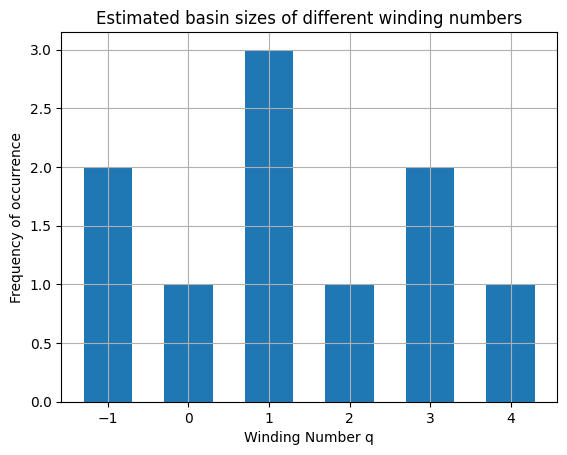

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ---------- تنظیمات ----------
N = 100              # تعداد نوسان‌گرها
K = 1.0              # ضریب کوپلینگ
tau = 0.0            # تاخیر زمانی (در این نسخه صفره)
t_max = 100          # مدت زمان شبیه‌سازی
dt = 0.1
t = np.arange(0, t_max, dt)

# ماتریس مجاورت حلقه‌ای (حلقه ساده)
def ring_adjacency(N):
    A = np.zeros((N, N))
    for i in range(N):
        A[i, (i-1)%N] = 1
        A[i, (i+1)%N] = 1
    return A

A = ring_adjacency(N)
k_i = np.sum(A, axis=1)  # همه k برابر 2 هستن در اینجا

# ---------- دینامیک کوراموتو بدون تاخیر ----------
def kuramoto(theta, t, K, A, k_i):
    dtheta = np.zeros(N)
    for i in range(N):
        coupling_sum = np.sum(A[i] * np.sin(theta - theta[i]))
        dtheta[i] = K / k_i[i] * coupling_sum
    return dtheta

# ---------- تابع برای محاسبه winding number ----------
def compute_winding_number(theta_final):
    dtheta = np.angle(np.exp(1j * (theta_final - np.roll(theta_final, -1))))
    q = np.round(np.sum(dtheta) / (2 * np.pi))
    return int(q)

# ---------- اجرای چند شبیه‌سازی ----------
def run_trials(num_trials=50):
    q_list = []
    for trial in range(num_trials):
        theta0 = np.random.uniform(0, 2*np.pi, N)  # شرایط اولیه تصادفی
        sol = odeint(kuramoto, theta0, t, args=(K, A, k_i))
        theta_final = sol[-1]
        q = compute_winding_number(theta_final)
        q_list.append(q)
    return q_list

# ---------- اجرای شبیه‌سازی ----------
q_results = run_trials(num_trials=10)

# ---------- نمایش نتایج ----------
unique_qs, counts = np.unique(q_results, return_counts=True)

plt.bar(unique_qs, counts, width=0.6)
plt.xlabel("Winding Number q")
plt.ylabel("Frequency of occurrence")
plt.title("Estimated basin sizes of different winding numbers")
plt.grid(True)
plt.show()


### Winding Number Formula

Given the final phase values of \( N \) oscillators as a vector:

$$
\theta = (\theta_1, \theta_2, \dots, \theta_N)
$$

The winding number \( q \) is defined as:

$$
q = \frac{1}{2\pi} \sum_{i=1}^{N} \Delta\theta_i
$$

where:

$$
\Delta\theta_i = \arg\left(e^{i(\theta_{i+1} - \theta_i)}\right)
$$

and assuming periodic boundary conditions:

$$
\theta_{N+1} = \theta_1
$$

So the full expression becomes:

$$
q = \frac{1}{2\pi} \sum_{i=1}^{N} \arg\left(e^{i(\theta_{i+1} - \theta_i)}\right)
$$



In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- تابع برای محاسبه winding number ----------
def compute_winding_number(theta_final):
    dtheta = np.angle(np.exp(1j * (theta_final - np.roll(theta_final, -1))))
    q = np.round(np.sum(dtheta) / (2 * np.pi))
    return int(q)

# ---------- اجرای چند شبیه‌سازی ----------

def run_trials(num_trials=50, output_file="winding_numbers.txt"):
    q_list = []
    with open(output_file, "w") as f:
        f.write("Sample\tWindingNumber\n")  # Header
        for trial in range(num_trials):
            filename = f"./kuramoto cpp/Save/Last_Phase/Last_Phase_S_{trial}.txt"
            theta_final = np.loadtxt(filename)
            q = compute_winding_number(theta_final)
            q_list.append(q)
            f.write(f"{trial}\t{q}\n")
            #if q == -2:
            #    print(f"Sample {trial} has a winding number of {q}")
    return q_list

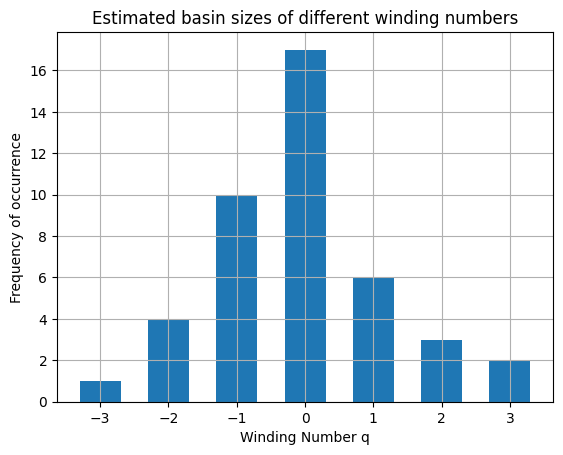

In [ ]:
# ---------- اجرای شبیه‌سازی ----------
q_results = run_trials(num_trials=43)

# ---------- نمایش نتایج ----------
unique_qs, counts = np.unique(q_results, return_counts=True)

plt.bar(unique_qs, counts, width=0.6)
plt.xlabel("Winding Number q")
plt.ylabel("Frequency of occurrence")
plt.title("Estimated basin sizes of different winding numbers")
plt.grid(True)
plt.show()
plt.savefig("dist.jpg", dpi=100)


### Visualization

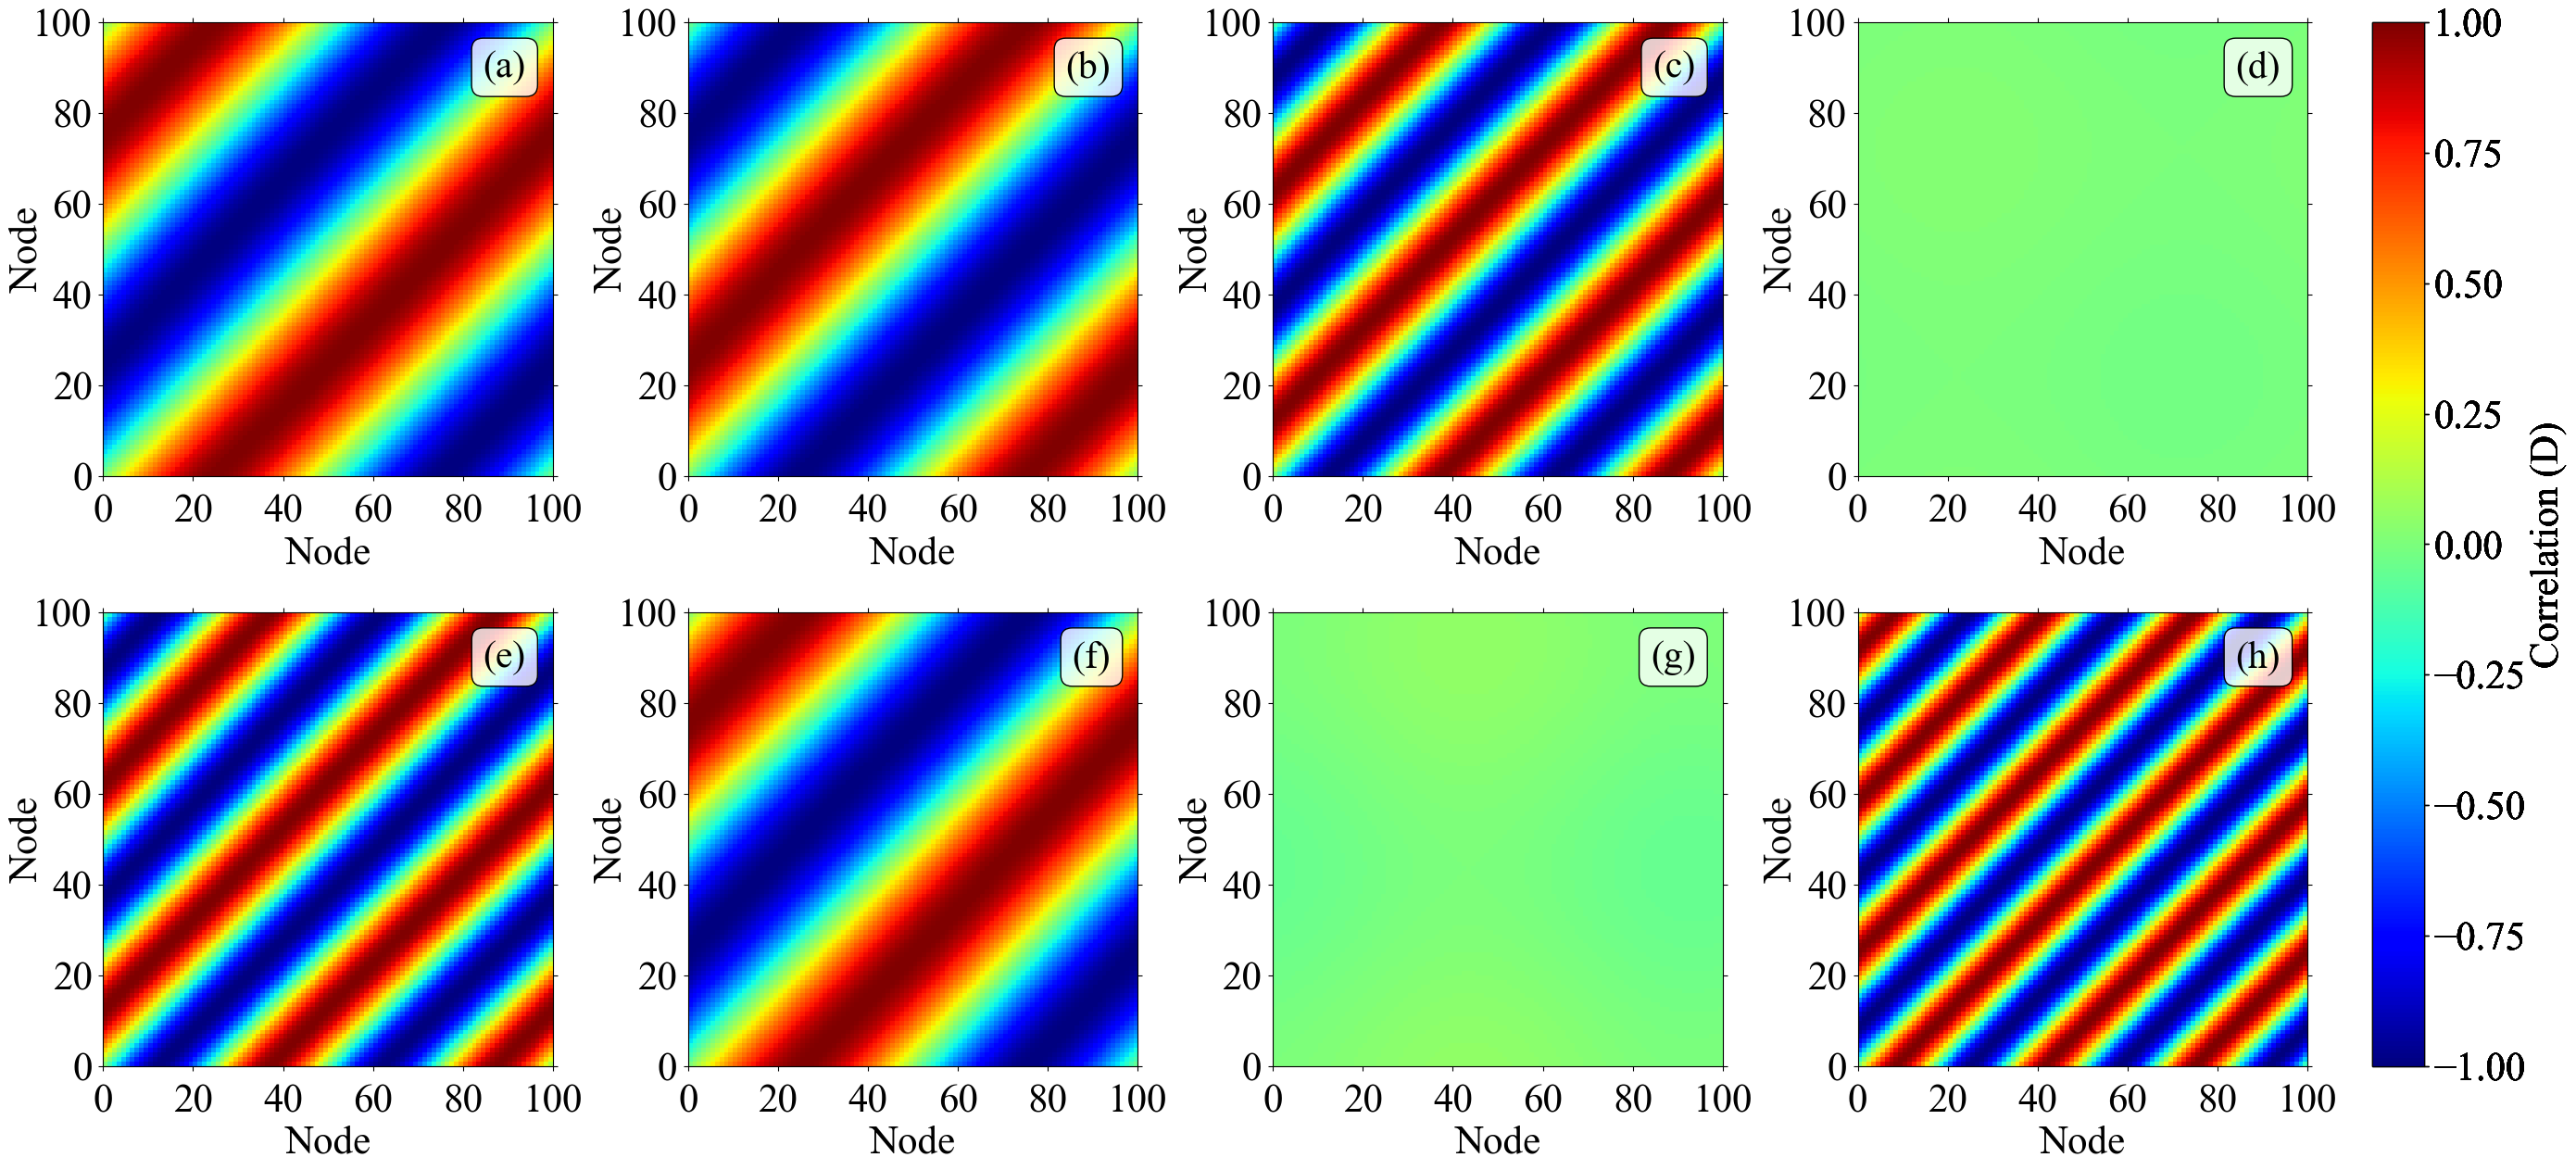

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os        
from matplotlib.ticker import AutoMinorLocator,MaxNLocator, MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from PIL import Image

font1 = {'family': 'Times New Roman', 'color': '#000000', 'weight': 'normal'}
fonts = 'Times New Roman'
Number_of_node=100
Number_of_step=40001#becuase start since 0

def plot(ax, data):
    Color_map_hsv = 'hsv'
    Color_map_brg = 'brg'
    Color_of_node = [0 for y in range(Number_of_node + 1)]

    Corolation = [[0 for x in range(Number_of_node)] for y in range(Number_of_node)] 
    Color_of_node[0] = 0
    for x in range(1, Number_of_node):  # Number_of_node+1-2
        Color_of_node[x] = data[x] % (2 * math.pi)
    Color_of_node[Number_of_node] = 2 * math.pi
    for x in range(0, Number_of_node):
        for y in range(0, Number_of_node):
            Corolation[x][y] = math.sin(data[x] - data[y])  # [satr][soton]

    figure = plt.gcf()  # get current figure
    data_Corolation = ax.pcolormesh(Corolation, cmap='jet', vmin=-1, vmax=1)  # binary #hsv
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)
    ax.set_xlabel('Node', fontdict=font1, fontsize=31)
    ax.set_ylabel('Node', fontdict=font1, fontsize=31, labelpad=-10)
    ax.set_ylim(0,100)
    ax.set_xlim(0,100)
    #ax.set_xticks([0.0,0.1, 0.2, 0.3, 0.4])925
    sub_ax = plt.axes([0.925, 0.148, 0.02, 0.704])  # [ , ,arz,ertefa]
    cbar = figure.colorbar(data_Corolation, cax=sub_ax, ticks=np.linspace(-1, 1, 9))
    cbar.set_label('Correlation (D)', fontdict=font1, fontsize=31)
    cbar.ax.tick_params(labelsize=31)

    # Change the y-axis tick labels font
    for label in cbar.ax.get_yticklabels():
        label.set_fontname(fonts)
        label.set_fontsize(31)
        label.set_color('#000000')  # Change the color of the labels


def text_plot(axes):
    annotations = ['(a)', '(b)', '(c)', '(d)','(e)', '(f)', '(g)', '(h)']
    for i, ax in enumerate(axes):
        ax.text(0.94, 0.94, annotations[i], fontdict=font1, fontsize=30,
                transform=ax.transAxes, ha='right', va='top',
                bbox=dict(boxstyle="round", ec="#000000", fc=(1, 1, 1, 0.80)))

def plot_framework(number_of_pic):
    ax = plt.subplot(2,4,number_of_pic)
    plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=False, pad=10)
    plt.tick_params(axis='y', which='both' , left=True, right=True, labelbottom=True, labeltop=False, pad=5)
    plt.xticks(font=fonts,fontsize=31,color= '#000000')
    plt.yticks(font=fonts,fontsize=31,color= '#000000')
    return ax

fig = plt.figure()
axes=[plot_framework(i) for i in range(1, 9)]

for i in range (0,7):
    trial=i
    plot(axes[trial],np.loadtxt( f"./kuramoto cpp/Save/Last_Phase/Last_Phase_S_{trial}.txt"))

plot(axes[7],np.loadtxt( f"./kuramoto cpp/Save/Last_Phase/Last_Phase_S_16.txt"))

text_plot(axes)



y_lim=0.148
x_lim=0.1
plt.subplots_adjust(top = 1-y_lim, bottom=y_lim,left=x_lim-0.05,right=1-x_lim, hspace=0.3, wspace=0.3)


plt.gcf().set_size_inches(28, 16)

plt.savefig("Figure4_dpi100.jpg", dpi=100)
plt.savefig("Figure4_dpi300.png", dpi=300)
plt.savefig("Figure4_dpi300.jpg", dpi=300)
plt.savefig("Figure4.pdf")
with Image.open('Figure4_dpi300.png') as img:
    img.save('Figure4_dpi300.tiff', format='TIFF', compression='tiff_lzw')

#plt.show()

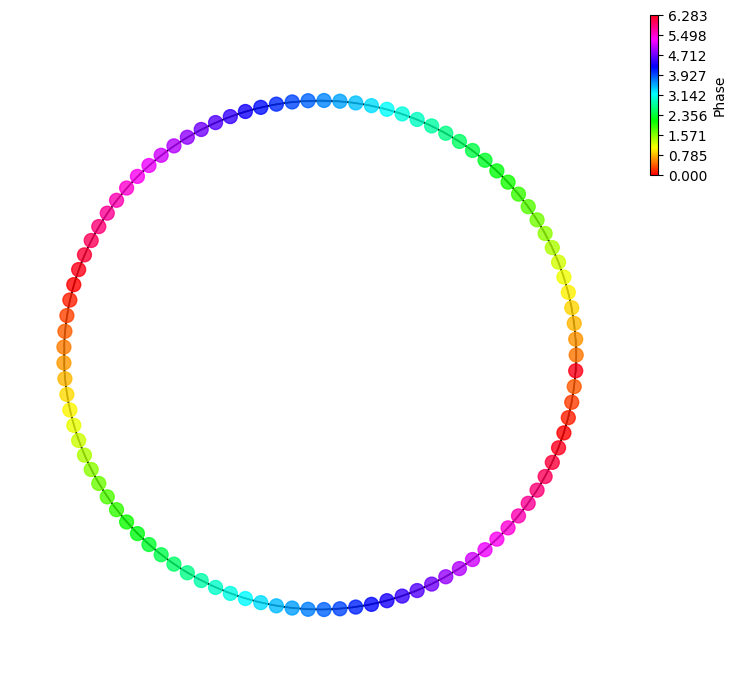

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
import math

# Load phase data
data = np.loadtxt("./kuramoto cpp/Save/Last_Phase/Last_Phase_S_8.txt")
Number_of_node = 100

# Create cycle graph
G = nx.cycle_graph(Number_of_node + 1)

# Define circular layout
pos = nx.circular_layout(G, scale=1.0)

G1 = nx.watts_strogatz_graph(n=Number_of_node, k=4, p=0)
pos1 = nx.circular_layout(G1)



# Assign phase-based colors to nodes
Color_of_node=[0 for y in range(Number_of_node+1)]
Color_of_node[0]=0
for x in range(0, Number_of_node):#Number_of_node+1-2
    Color_of_node[x]=data[x]%(2*math.pi)
Color_of_node[Number_of_node]=2*math.pi

# Colormap
Color_map_hsv = 'hsv'

def plot_color_cyrcle_phase(ax7):  
    nx.draw(G,
            pos, 
            node_color=Color_of_node, 
            node_size=100, 
            alpha=0.8, 
            cmap=Color_map_hsv,
            ax=ax7)
    
    # Optional: draw extra edges (but unrelated graph here?)
    rand_G = nx.random_geometric_graph(14, 1, seed=896803)
    nx.draw_networkx_edges(G1, pos=nx.circular_layout(G1), alpha=0.6, ax=ax7)
    #nx.draw_networkx_edges(G, pos=pos, alpha=0.6, ax=ax7)


    cbar_ax = plt.axes([0.925, 0.72, 0.01, 0.2])
    norm = mpl.colors.Normalize(vmin=0, vmax=2 * math.pi)
    cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=Color_map_hsv, norm=norm),
                        cax=cbar_ax, ticks=np.linspace(0, 2 * math.pi, 9))
    cbar.set_label('Phase')

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
plot_color_cyrcle_phase(ax)
plt.show()
